**1. Load the Fake-or-Real Dataset**

The dataset is avalable in https://bil.eecs.yorku.ca/datasets/.
The dataset containes directories with training, validation and test sets, with 'fake' and 'real' directories each. 

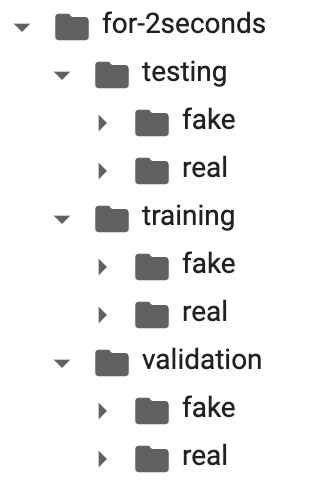

*Note: The test set in the give dataset contains only synthetic voices from one unseen algorithm. Therefore, for the assignment the validation set is splitted to new validation and test sets.*

In [ ]:
!wget https://www.eecs.yorku.ca/~bil/Datasets/for-2sec.tar.gz -O /content/for-2sec.tar.gz
!ls -lh /content/for-2sec.tar.gz
!tar -xzf "/content/for-2sec.tar.gz" -C "/content/"

--2023-04-02 12:57:52--  https://www.eecs.yorku.ca/~bil/Datasets/for-2sec.tar.gz
Resolving www.eecs.yorku.ca (www.eecs.yorku.ca)... 130.63.94.24
Connecting to www.eecs.yorku.ca (www.eecs.yorku.ca)|130.63.94.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1048591372 (1000M) [application/x-tar]
Saving to: ‘/content/for-2sec.tar.gz’

/content/for-2sec.t 100%[===================>]   1000M  96.3MB/s    in 11s     

2023-04-02 12:58:04 (90.4 MB/s) - ‘/content/for-2sec.tar.gz’ saved [1048591372/1048591372]

-rw-r--r-- 1 root root 1001M May 22  2019 /content/for-2sec.tar.gz


**2. Clone project from repository**

https://github.com/shiritdvir/Corsound_assignment


In [ ]:
!git clone https://github.com/shiritdvir/Corsound_assignment.git

Cloning into 'Corsound_assignment'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), 5.64 KiB | 303.00 KiB/s, done.


**3. Install required packages**

In [ ]:
!pip install -r /content/Corsound_assignment/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 KB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6

In [ ]:
%cd /content/Corsound_assignment

/content/Corsound_assignment


**4. Load Wav2Vec pre-trained model**

In [ ]:
from src.model_utils import load_model
from config import model_name

model, model_processor = load_model(model_name)

/usr/local/lib/python3.9/dist-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForSequenceClassification: ['quantizer.weight_proj.weight', 'project_q.weight', 'quantizer.codevectors', 'quantizer.weight_proj.bias', 'project_hid.weight', 'project_q.bias', 'project_hid.bias']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['projector.bias', 'classifier.weight', 'classifier

**5. Load data**

In [ ]:
from config import *
from src.data_utils import get_dataset, split_dataset

data_path = "/content/for-2seconds"
train_dataset = get_dataset(data_path, "training", model_processor)
validation_dataset = get_dataset(data_path, "validation", model_processor)
validation_dataset, test_dataset = split_dataset(validation_dataset, test_size=test_size)

Map:   0%|          | 0/13956 [00:00<?, ? examples/s]

training dataset:
  Total samples: 13956
  Real samples: 6978 (50.00%)
  Fake samples: 6978 (50.00%)



Map:   0%|          | 0/2826 [00:00<?, ? examples/s]

validation dataset:
  Total samples: 2826
  Real samples: 1413 (50.00%)
  Fake samples: 1413 (50.00%)



**6. Train model**

In [ ]:
from src.model_utils import train_model
epochs = 5
classifier_trainer = train_model(model,
                                 model_processor,
                                 train_dataset=train_dataset,
                                 eval_dataset=validation_dataset,
                                 batch_size=batch_size,
                                 epochs=epochs,
                                 lr=lr,
                                 weight_decay=weight_decay)

Model device: cuda:0


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Eer
1,0.005600,0.011642,0.998230,0.249558
2,0.017400,0.009783,0.998673,0.248894
3,0.020800,0.010117,0.998673,0.249336
4,0.000700,0.010402,0.998673,0.249336
5,0.000600,0.010289,0.998673,0.249336


**7. Evaluate the model**

/usr/local/lib/python3.9/dist-packages/pyeer/eer_stats.py:219: UserWarning: It is possible that you had set the wrong score type. Please consider reviewing if you are using dissimilarity or similarity scores
  warn("It is possible that you had set the wrong score"


Evaluation Results: {'eval_loss': 0.004232357256114483, 'eval_accuracy': 1.0, 'eval_eer': 0.5, 'eval_runtime': 4.6258, 'eval_samples_per_second': 122.357, 'eval_steps_per_second': 3.891, 'epoch': 5.0}


/usr/local/lib/python3.9/dist-packages/pyeer/eer_stats.py:219: UserWarning: It is possible that you had set the wrong score type. Please consider reviewing if you are using dissimilarity or similarity scores
  warn("It is possible that you had set the wrong score"


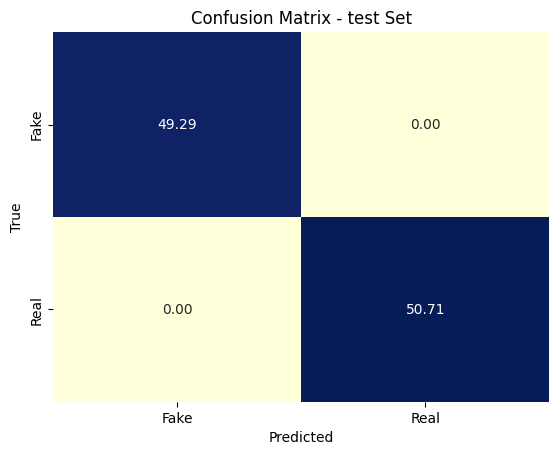

In [ ]:
from src.model_utils import evaluate_model
evaluate_model(classifier_trainer, test_dataset, 'test')